In [3]:
#@title Everything in Part 1 copied over

!pip install -U -q PyDrive
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from collections import defaultdict

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.utils import plot_model

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

stockData = drive.CreateFile({'id':"1Gtf_20aW4H81JRwjvdKozlF49sXpZzID"}) 
stockData.GetContentFile('stock_data.csv')
cleaned_data = pd.read_csv('stock_data.csv')
cleaned_data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Text,Sentiment
0,kicker on my watchlist xide tit soq pnk cpw bp...,1
1,user aap movie return for the fea geed indicat...,1
2,user i d be afraid to short amzn they are look...,1
3,mnta over,1
4,oi over,1


In [4]:
X = cleaned_data['Text']
y = cleaned_data['Sentiment']

vec = CountVectorizer(max_features=4000)
X = vec.fit_transform(X).toarray()

pca = PCA(n_components=256)
X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<h1 align="center">Linear Regression</h1>

<img src="https://miro.medium.com/v2/resize:fit:1400/1*Cw5ZSYDkIFpmhBwr-hN84A.png" align="right">

For linear regression, we basically just want to find a best fit line. Using the formula $\hat{y}=w^Tx+b$, we want to find the optimal $w$ and $b$ that fits the data. This can be obtained by finding the $w$ that minimizes $||Xw-y||^2_2$.


However, in order to prevent overfitting, we also want to introduce regularization. Basically, we want to minimize $||Xw-y||^2_2+\alpha ||w||^2_2$ with the optimal $w$. If $w$ is too large OVERALL, then the error will be big, implying overfitting.

Buuuut there is one more problem: We are doing classification! Hence, we shall use the variant RidgeClassifier which basically transforms the binary outputs to -1 and 1, and then performs linear regression, and depending on the sign of the final result, classifies it accordingly. Ridge Regression also allows us to perform regularization as mentioned above.

In [7]:
model = RidgeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Ridge Classifier Accuracy: {}".format(accuracy_score(y_test,y_pred)))

Ridge Classifier Accuracy: 0.7670405522001725


I claim we can do better. Since $\alpha$ is a hyperparamter, we can modify it to obtain the optimal result.

In [14]:
alphas = np.linspace(0,2,201)
res = []

for i in alphas:
  model = RidgeClassifier(alpha=i)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print("Ridge Classifier Accuracy (alpha = {}): {}".format(i,accuracy_score(y_test,y_pred)))
  res.append(accuracy_score(y_test,y_pred))

Ridge Classifier Accuracy (alpha = 0.0): 0.7687661777394306
Ridge Classifier Accuracy (alpha = 0.01): 0.7687661777394306
Ridge Classifier Accuracy (alpha = 0.02): 0.7687661777394306
Ridge Classifier Accuracy (alpha = 0.03): 0.7687661777394306
Ridge Classifier Accuracy (alpha = 0.04): 0.7687661777394306
Ridge Classifier Accuracy (alpha = 0.05): 0.7687661777394306
Ridge Classifier Accuracy (alpha = 0.06): 0.7687661777394306
Ridge Classifier Accuracy (alpha = 0.07): 0.7687661777394306
Ridge Classifier Accuracy (alpha = 0.08): 0.7687661777394306
Ridge Classifier Accuracy (alpha = 0.09): 0.7687661777394306
Ridge Classifier Accuracy (alpha = 0.1): 0.7687661777394306
Ridge Classifier Accuracy (alpha = 0.11): 0.7687661777394306
Ridge Classifier Accuracy (alpha = 0.12): 0.7687661777394306
Ridge Classifier Accuracy (alpha = 0.13): 0.7687661777394306
Ridge Classifier Accuracy (alpha = 0.14): 0.7687661777394306
Ridge Classifier Accuracy (alpha = 0.15): 0.7687661777394306
Ridge Classifier Accuracy 

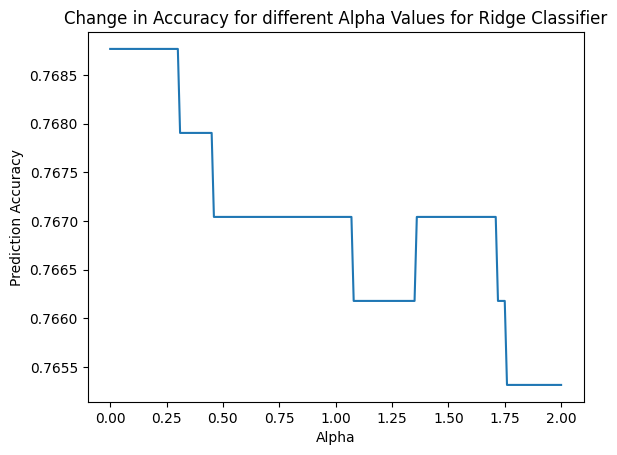

In [15]:
'''
Plotting the error over the different alphas
'''
plt.title('Change in Accuracy for different Alpha Values for Ridge Classifier')
plt.xlabel('Alpha')
plt.ylabel('Prediction Accuracy')
 
plt.plot(alphas,res)

Where we realize that adding regularization actually makes the prediction accuracy worse. Hence, using no regularization for ridge classification in this mini-experiment is the optimal solution. 